In [2]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from skimage import io
import pandas as pd
import os
from tqdm import tqdm

In [3]:
image_nifti = nib.load("data/test/imgs/HIP_0411.nii.gz").get_fdata()
image_png = io.imread("data/test/imgs/HIP_0411.png")
target_nifti = nib.load("data/test/targets/HIP_0411.nii.gz").get_fdata()
target_png = io.imread("data/test/targets/HIP_0411.png")

In [4]:

print("Nifti: ")
print("     image dtype: ", image_nifti.dtype)
print("     target dtype: ", target_nifti.dtype)
print("     image shape: ", image_nifti.shape)
print("     target shape: ", target_nifti.shape)
print("     image range: ", np.min(image_nifti), np.max(image_nifti))
print("     target range: ", np.min(target_nifti), np.max(target_nifti))
print("     image unique values: ", len(np.unique(image_nifti)))
print("     target unique values: ", len(np.unique(target_nifti)))
print()

print("PNG: ")
print("     image dtype: ", image_png.dtype)
print("     target dtype: ", target_png.dtype)
print("     image shape: ", image_png.shape)
print("     target shape: ", target_png.shape)
print("     image range: ", np.min(image_png), np.max(image_png))
print("     target range: ", np.min(target_png), np.max(target_png))
print("     image unique values: ", len(np.unique(image_png)))
print("     target unique values: ", len(np.unique(target_png)))
print()

print("Image difference after conversion: ", np.sum(image_nifti - image_png))
print("Target difference after conversion : ", np.sum(target_nifti - target_png))

Nifti: 
     image dtype:  float64
     target dtype:  float64
     image shape:  (2860, 2874)
     target shape:  (2860, 2874)
     image range:  0.0 255.0
     target range:  0.0 6.0
     image unique values:  256
     target unique values:  7

PNG: 
     image dtype:  uint8
     target dtype:  uint8
     image shape:  (2860, 2874)
     target shape:  (2860, 2874)
     image range:  0 255
     target range:  0 6
     image unique values:  256
     target unique values:  7

Image difference after conversion:  0.0
Target difference after conversion :  0.0


In [6]:
# collect the above data points into a dataframe containing all files
# commented out, as it has been run once, and the data is stored in data.csv

# Get filenames and folder
# def get_filenames(folder):
#     filenames = []
#     for root, dirs, files in os.walk(folder):
#         for file in files:
#             if ("overview" not in file) and (file.endswith(".nii.gz") or file.endswith(".png")):
#                 filenames.append(os.path.join(root, file))
#     return filenames

# data = []
# paths = get_filenames("data")
# for path in tqdm(paths):
#     if "imgs" in path:
#         xy = "image"
#     elif "targets" in path:
#         xy = "target"
#     else:
#         xy = "unknown"
# 
#     ending = path.split(".")[-1]
#     if ending == "gz":
#         image = nib.load(path).get_fdata()
#     elif ending == "png":
#         image = io.imread(path)
#     else:
#         print("Unknown file type")
#         break
#     dtype = image.dtype
#     shape = image.shape
#     val_range = (np.min(image), np.max(image))
#     unique = len(np.unique(image))
#     this_data = {
#         "file":   path,
#         "ending": ending,
#         "type":   xy,
#         "dtype":  dtype,
#         "shape":  shape,
#         "range":  val_range,
#         "unique": unique
#         }
#     data.append(this_data)
# 
# data = pd.DataFrame(data)
# 
# data.to_pickle("data/data.pkl")

In [7]:
df = pd.read_pickle("data/data.pkl")

Total nr of images:  458
Total nr of targets:  458
Nr of training samples:  320
Nr of validation samples:  91
Nr of test samples:  47


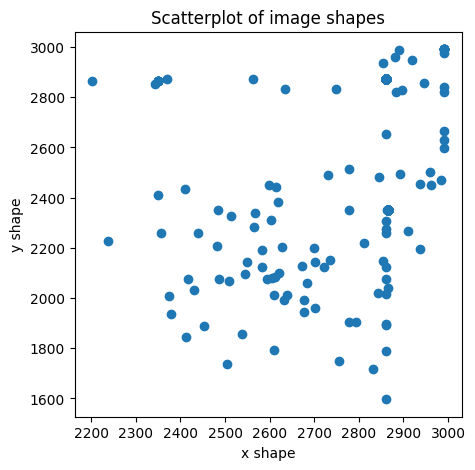

C:\Users\malte\AppData\Local\Temp\ipykernel_27832\694965096.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("prism", 9)


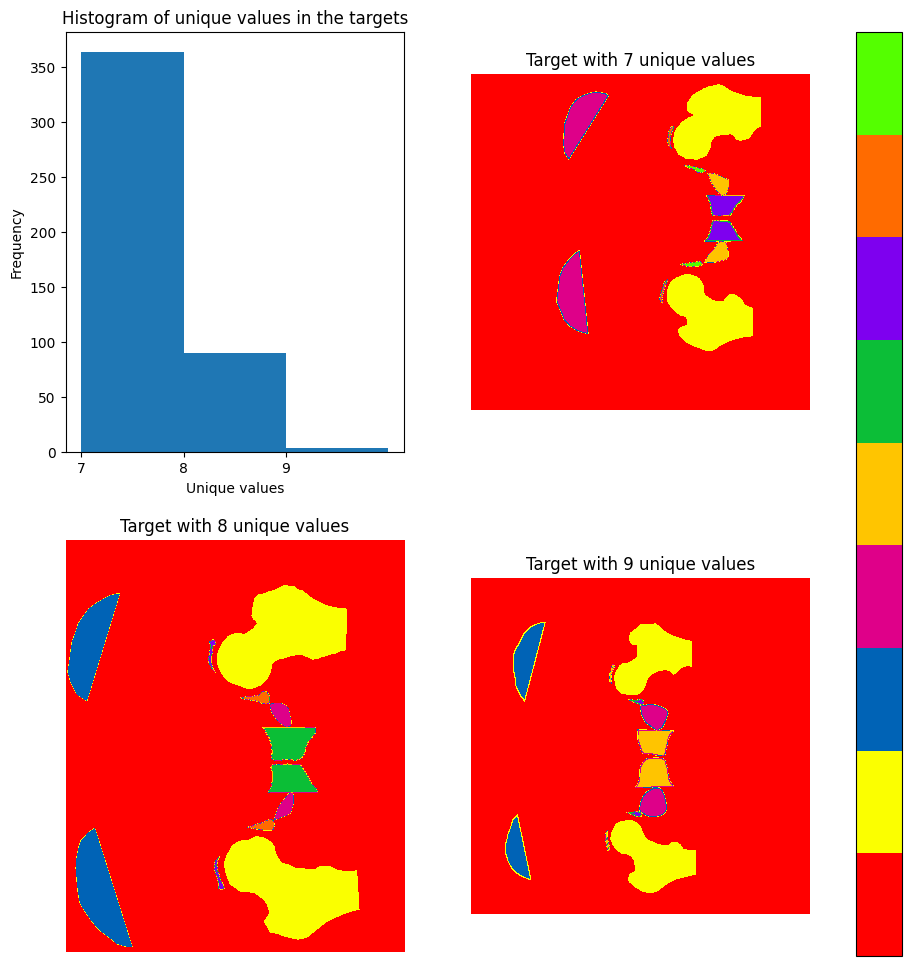

In [22]:
# Analyze the data distribution
data = df[df["ending"] == "png"].drop("ending", axis=1)

# distribution of training, validation and test samples
print("Total nr of images: ", len(data[data["type"] == "image"]))
print("Total nr of targets: ", len(data[data["type"] == "target"]))
imgs = data[data["type"] == "image"]
print("Nr of training samples: ", len(imgs[imgs["file"].str.contains("train")]))
print("Nr of validation samples: ", len(imgs[imgs["file"].str.contains("val")]))
print("Nr of test samples: ", len(imgs[imgs["file"].str.contains("test")]))
del imgs

# distribution of shapes as a scatterplot with x and y being the shape of the image
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
x_shape = data[data["type"] == "image"]["shape"].apply(lambda x: x[0])
y_shape = data[data["type"] == "image"]["shape"].apply(lambda x: x[1])
ax.scatter(x_shape, y_shape)
ax.set_xlabel("x shape")
ax.set_ylabel("y shape")
ax.set_title("Scatterplot of image shapes")
plt.show()

# histogram of unique values for the targets
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
unique = data[data["type"] == "target"]["unique"]
ax[0, 0].hist(unique, bins=3, range=(7, 10))
ax[0, 0].set_xticks([7, 8, 9])
ax[0, 0].set_xlabel("Unique values")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].set_title("Histogram of unique values in the targets")

color_map = plt.cm.get_cmap("prism", 9)

ax[0, 1].imshow(io.imread(data[(data["type"] == "target") & (data["unique"] == 7)]["file"].values[0]), cmap=color_map)
ax[0, 1].set_title("Target with 7 unique values")
ax[0, 1].axis("off")

ax[1, 0].imshow(io.imread(data[(data["type"] == "target") & (data["unique"] == 8)]["file"].values[0]), cmap=color_map)
ax[1, 0].set_title("Target with 8 unique values")
ax[1, 0].axis("off")

ax[1, 1].imshow(io.imread(data[(data["type"] == "target") & (data["unique"] == 9)]["file"].values[0]), cmap=color_map)
ax[1, 1].set_title("Target with 9 unique values")
ax[1, 1].axis("off")

# show colorbar
fig.colorbar(plt.cm.ScalarMappable(cmap=color_map), ax=ax, orientation="vertical", ticks=[])
plt.show()


Text(0.5, 1.0, 'Histogram of .png converted target')

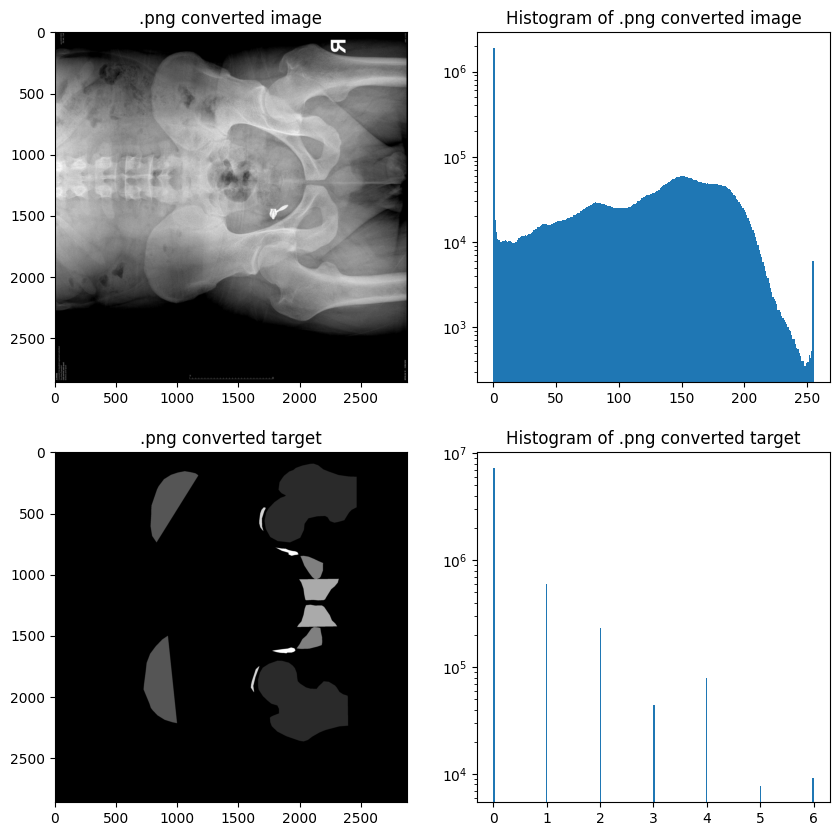

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(image_nifti, cmap="gray")
axes[0, 0].set_title(".png converted image")
axes[0, 1].hist(image_nifti.ravel(), bins=256, range=(0, 255))
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("Histogram of .png converted image")

axes[1, 0].imshow(target_png, cmap="gray")
axes[1, 0].set_title(".png converted target")
axes[1, 1].hist(target_png.ravel(), bins=256, range=(0, 6))
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("Histogram of .png converted target")

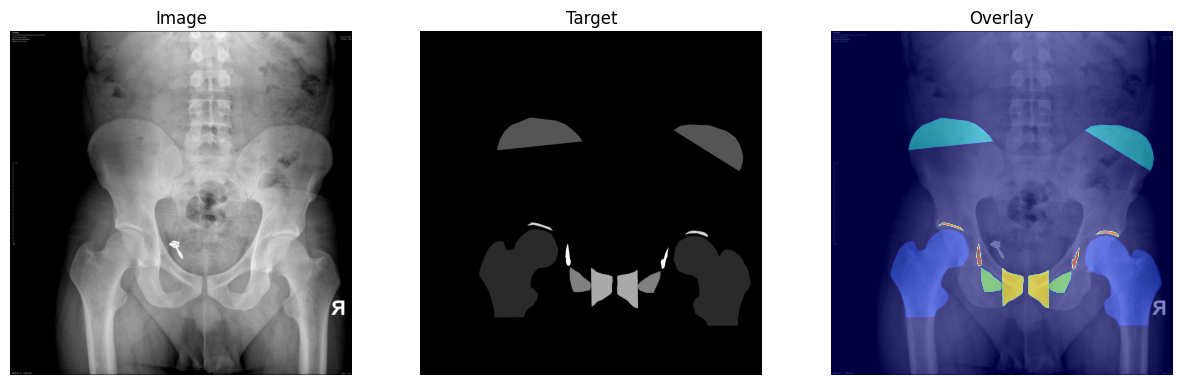

In [11]:
# overlay the target on the image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(np.rot90(image_png, k=-1), cmap="gray")
axes[0].set_title("Image")
axes[0].axis("off")
axes[1].imshow(np.rot90(target_png, k=-1), cmap="gray")
axes[1].set_title("Target")
axes[1].axis("off")
axes[2].imshow(np.rot90(image_png, k=-1), cmap="gray")
axes[2].imshow(np.rot90(target_png, k=-1), cmap="jet", alpha=0.5)
axes[2].set_title("Overlay")
axes[2].axis("off")
plt.show()